In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
bl = pd.read_excel('bplm.xlsx')
bl.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
bl.shape

(5000, 14)

In [4]:
bl.columns = bl.columns.str.lower()
bl.columns = bl.columns.str.replace(' ','_')

In [5]:
bl['zip_code'] = bl['zip_code'].astype(str)
bl['id'] = bl['id'].astype(str)

In [6]:
bl1 = bl.loc[bl['personal_loan']==1]
bl0 = bl.loc[bl['personal_loan']==0]

bl1_samp = bl1.sample(400)
bl0_samp = bl0.sample(400)

bldfc = pd.concat([bl1_samp, bl0_samp])
bldfc['personal_loan'].value_counts()

0    400
1    400
Name: personal_loan, dtype: int64

In [7]:
bl_unseen = bldfc.sample(frac=0.20)

bl_train = bldfc.sample(frac=0.80)

In [8]:
bl_train.shape

(640, 14)

In [9]:
bl_unseen.shape

(160, 14)

In [10]:
bl_train.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

In [11]:
bl_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,640.0,45.592188,11.362332,24.0,36.0,46.0,55.00,66.0
experience,640.0,20.354688,11.395197,-2.0,10.0,21.0,29.00,42.0
income,640.0,107.315625,53.218130,9.0,60.0,113.0,154.00,203.0
family,640.0,2.492188,1.161431,1.0,1.0,2.0,4.00,4.0
ccavg,640.0,2.894870,2.150768,0.0,1.1,2.5,4.25,10.0
education,640.0,2.037500,0.815634,1.0,1.0,2.0,3.00,3.0
mortgage,640.0,74.028125,133.055376,0.0,0.0,0.0,120.00,617.0
personal_loan,640.0,0.503125,0.500381,0.0,0.0,1.0,1.00,1.0
securities_account,640.0,0.104688,0.306390,0.0,0.0,0.0,0.00,1.0
cd_account,640.0,0.173437,0.378921,0.0,0.0,0.0,0.00,1.0


In [13]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue='personal_loan', aspect=4)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    plt.show();

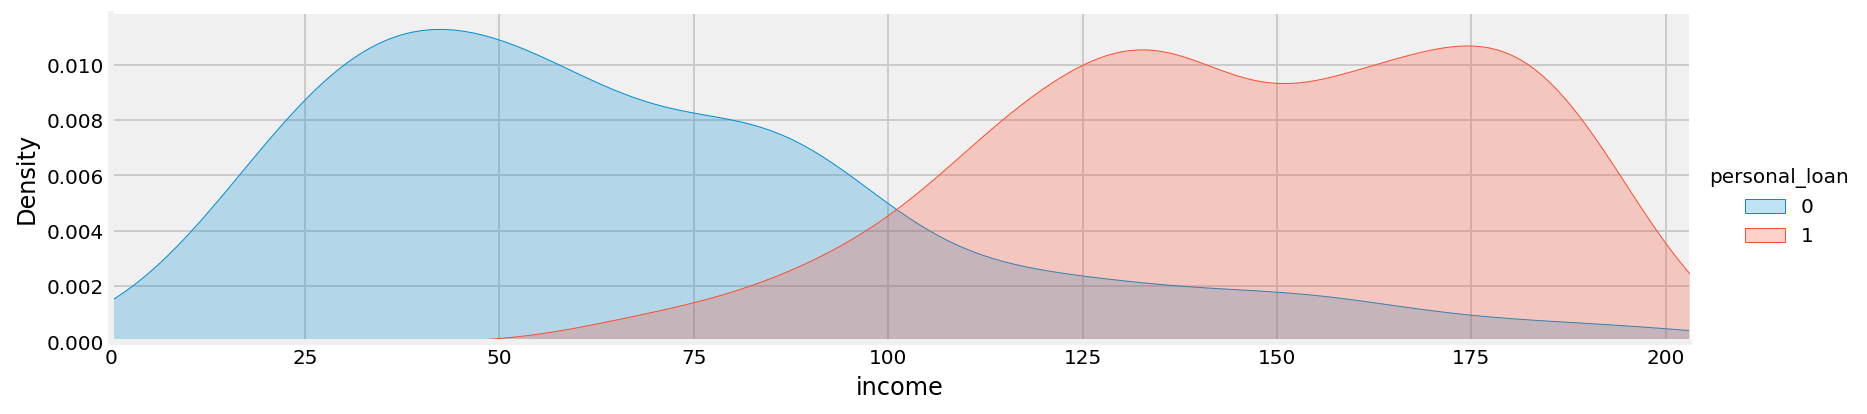

In [14]:
facetgridplot(bl_train, 'income')

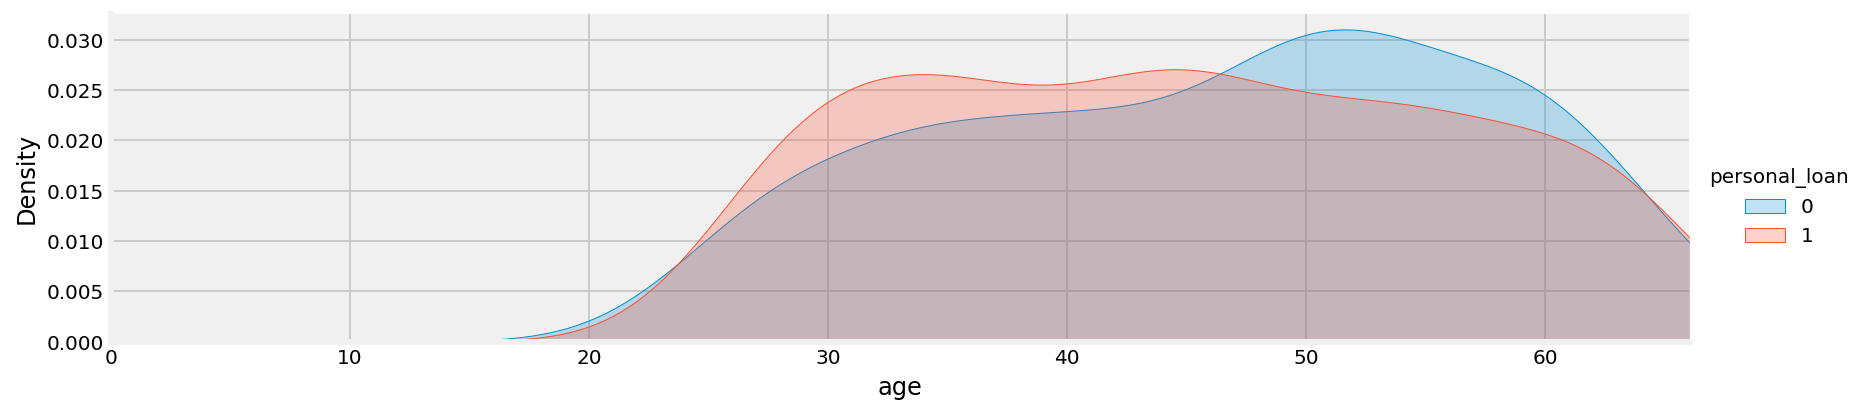

In [15]:
facetgridplot(bl_train, 'age')

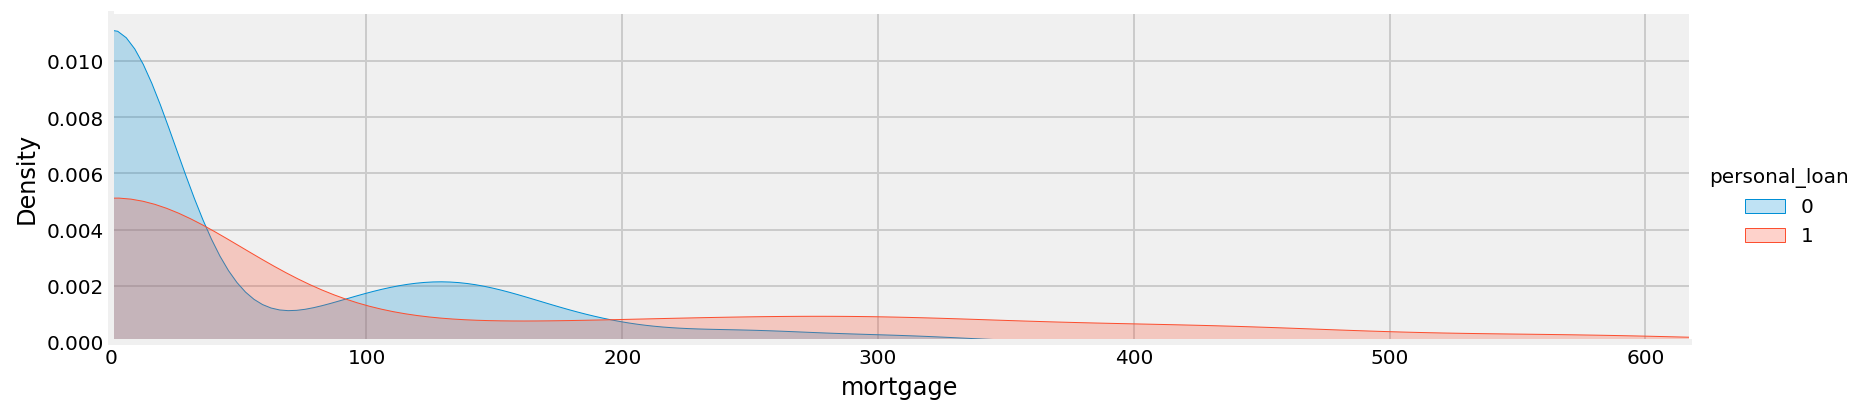

In [16]:
facetgridplot(bl_train, 'mortgage')

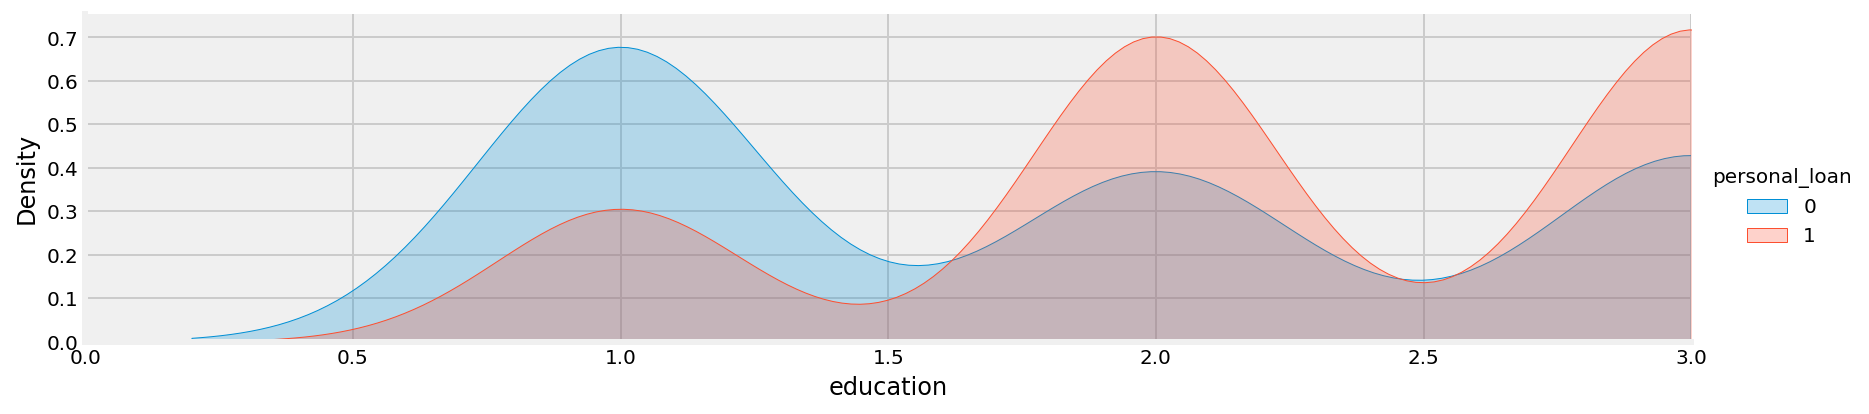

In [17]:
facetgridplot(bl_train, 'education')

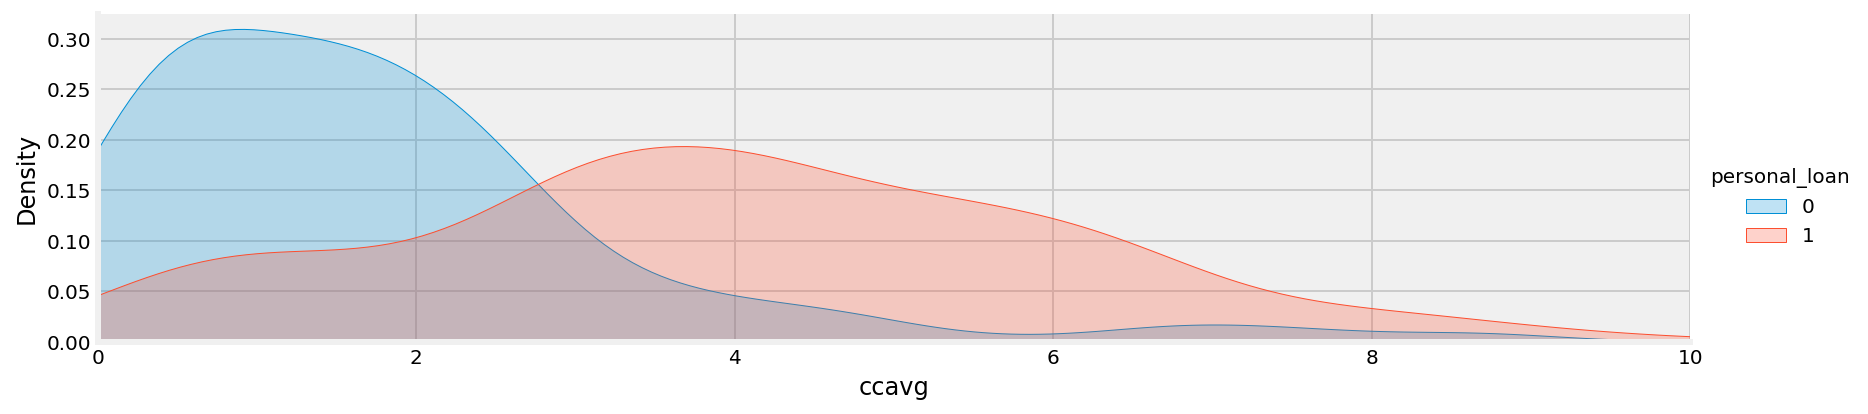

In [18]:
facetgridplot(bl_train, 'ccavg')

In [12]:
#set target and preprocessing 
#Using all features

target = 'personal_loan'

features_all = ['age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'securities_account',
       'cd_account', 'online', 'creditcard']

#Training set

X = bl_train[features_all]
y = bl_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_a = scaler.transform(X_train)
X_test_a = scaler.transform(X_test)


#Unseen set

X_us = bl_unseen[features_all]
y_us = bl_unseen[target]

#Whole dataset
X_wh = bl[features_all]
y_wh = bl[target]

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.82      0.90      0.86        61

    accuracy                           0.86       128
   macro avg       0.86      0.86      0.86       128
weighted avg       0.86      0.86      0.86       128

accuracy_train =  0.8652
accuracy_test =  0.8594
accuracy is =  0.859375


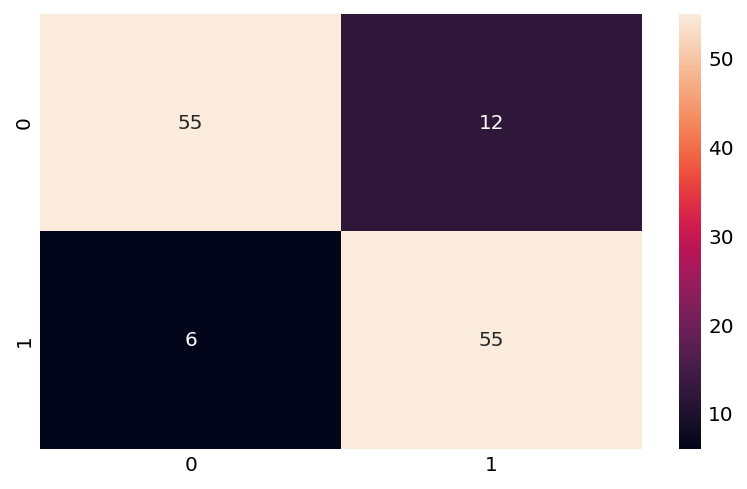

In [52]:
##Logistic Regression Model

#Training set
lg = LogisticRegression()
lg.fit(X_train, y_train)

y_pred = lg.predict(X_test)
y_pp = lg.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(lg.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(lg.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        68
           1       0.88      0.91      0.90        92

    accuracy                           0.88       160
   macro avg       0.88      0.88      0.88       160
weighted avg       0.88      0.88      0.88       160

accuracy_unseen =  0.8812
accuracy is =  0.88125


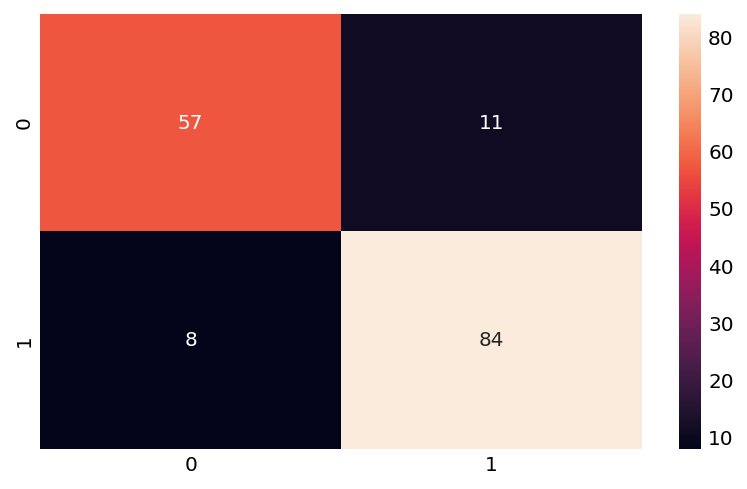

In [53]:
#Unseen set

lg.fit(X_us, y_us)

y_pred_us = lg.predict(X_us)
y_pp_us = lg.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(lg.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4520
           1       0.54      0.33      0.41       480

    accuracy                           0.91      5000
   macro avg       0.73      0.65      0.68      5000
weighted avg       0.89      0.91      0.90      5000

accuracy_unseen =  0.9084
accuracy is =  0.9084


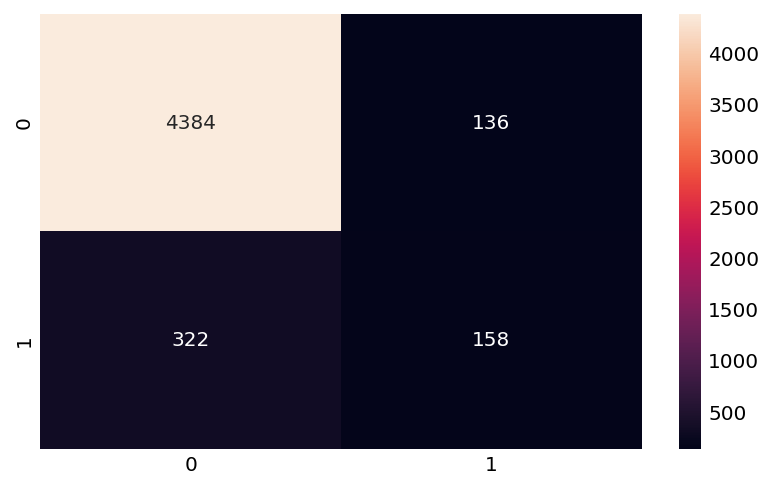

In [54]:
#Whole set

lg.fit(X_wh, y_wh)

y_pred_wh = lg.predict(X_wh)
y_pp_wh = lg.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_unseen = {:7.4f}'.format(lg.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)

              precision    recall  f1-score   support

           0       0.49      0.52      0.51        67
           1       0.44      0.41      0.42        61

    accuracy                           0.47       128
   macro avg       0.47      0.47      0.47       128
weighted avg       0.47      0.47      0.47       128

accuracy_train =  0.5156
accuracy_test =  0.4688
accuracy is =  0.46875


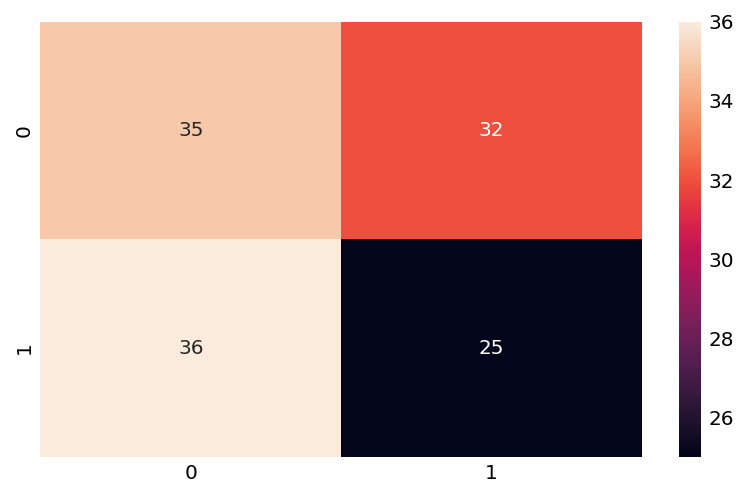

In [55]:
##Support Vector Machine

#Training set
svm = SVC(kernel='linear', probability=True, max_iter=1000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_pp = svm.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(svm.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(svm.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        68
           1       0.78      0.76      0.77        92

    accuracy                           0.74       160
   macro avg       0.73      0.73      0.73       160
weighted avg       0.74      0.74      0.74       160

accuracy_unseen =  0.7375
accuracy is =  0.7375


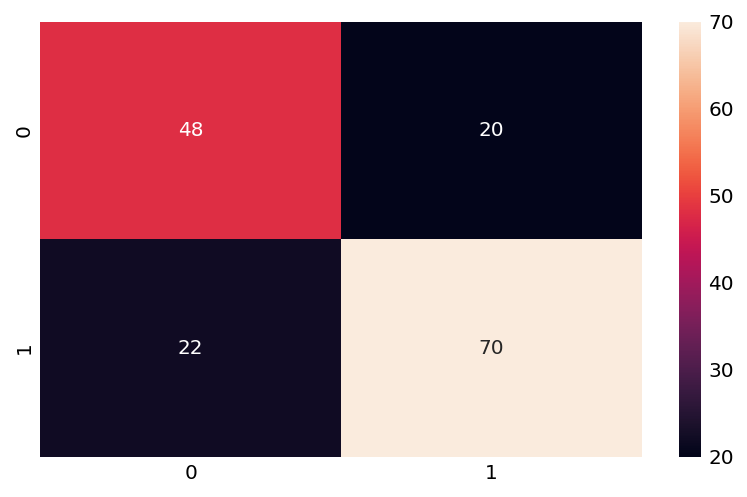

In [56]:
#Unseen set

svm.fit(X_us, y_us)

y_pred_us = svm.predict(X_us)
y_pp_us = svm.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(svm.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.92      0.40      0.56      4520
           1       0.11      0.68      0.19       480

    accuracy                           0.43      5000
   macro avg       0.52      0.54      0.37      5000
weighted avg       0.84      0.43      0.52      5000

accuracy_unseen =  0.4264
accuracy is =  0.4264


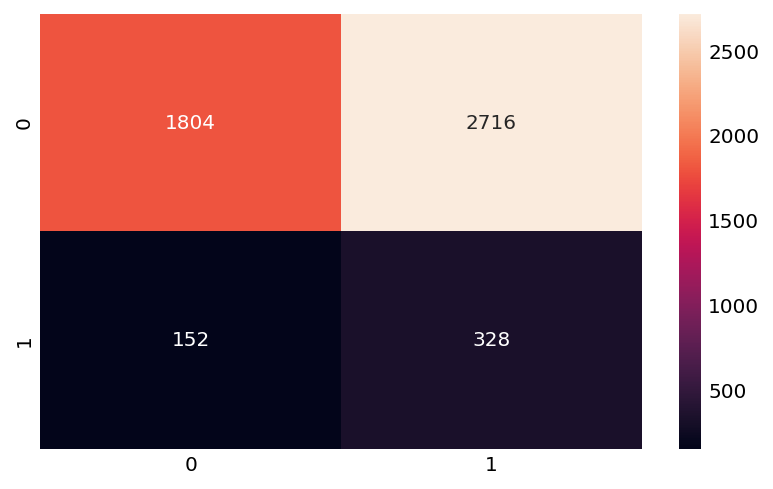

In [57]:
#Whole set

svm.fit(X_wh, y_wh)

y_pred_wh = svm.predict(X_wh)
y_pp_wh = svm.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_unseen = {:7.4f}'.format(svm.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        67
           1       0.87      0.79      0.83        61

    accuracy                           0.84       128
   macro avg       0.85      0.84      0.84       128
weighted avg       0.85      0.84      0.84       128

accuracy_train =  0.8320
accuracy_test =  0.8438
accuracy is =  0.84375


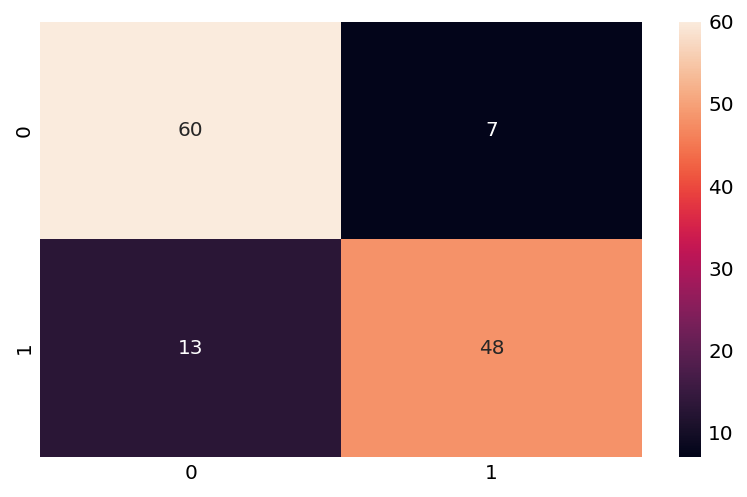

In [59]:
#Naive Bayes model

nb = GaussianNB()

#Training set
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
y_pp = nb.predict_proba(X_test)[:, 1]

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test, y_pred))
    
print('accuracy_train = {:7.4f}'.format(nb.score(X_train, y_train)))
print('accuracy_test = {:7.4f}'.format(nb.score(X_test, y_test)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        68
           1       0.90      0.82      0.86        92

    accuracy                           0.84       160
   macro avg       0.84      0.85      0.84       160
weighted avg       0.85      0.84      0.84       160

accuracy_unseen =  0.8438
accuracy is =  0.84375


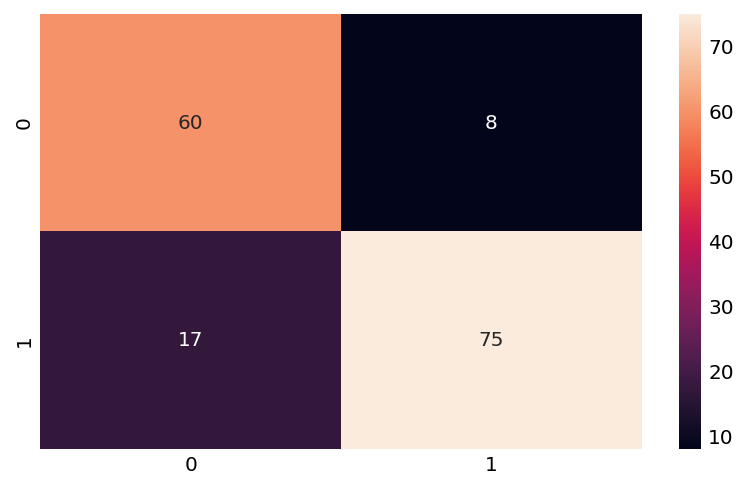

In [60]:
#Unseen set

nb.fit(X_us, y_us)

y_pred_us = nb.predict(X_us)
y_pp_us = nb.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(nb.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.44      0.59      0.50       480

    accuracy                           0.89      5000
   macro avg       0.70      0.76      0.72      5000
weighted avg       0.91      0.89      0.90      5000

accuracy_unseen =  0.8890
accuracy is =  0.889


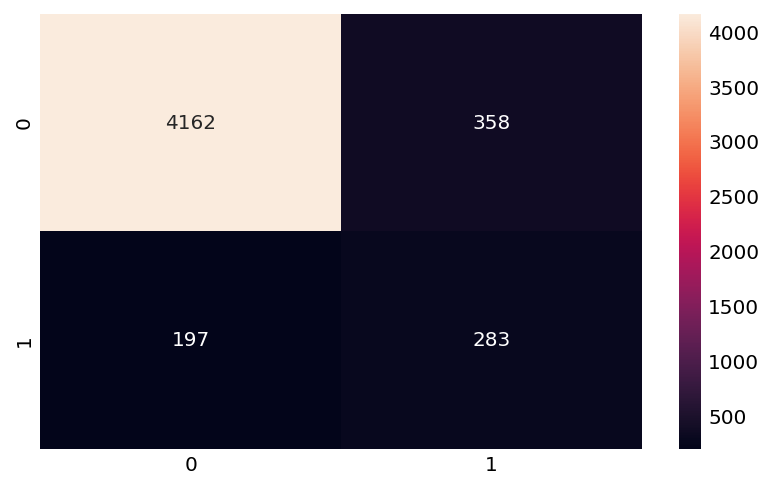

In [61]:
#Whole set

nb.fit(X_wh, y_wh)

y_pred_wh = nb.predict(X_wh)
y_pp_wh = nb.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_unseen = {:7.4f}'.format(nb.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)

In [66]:
#Reduced features

target = 'personal_loan'
features_reduced = ['income', 'family', 'education', 'ccavg', 'mortgage', 'cd_account', 'online']

Xr = bl_train[features_reduced]
yr = bl_train[target]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(Xr, yr, test_size = 0.2, random_state = 42)

scaler = StandardScaler()

scaler.fit(X_train_r)

X_train_r = scaler.transform(X_train_r)
X_test_r = scaler.transform(X_test_r)


#Unseen set

X_us = bl_unseen[features_reduced]
y_us = bl_unseen[target]

#Whole dataset
X_wh = bl[features_reduced]
y_wh = bl[target]


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        67
           1       0.92      0.90      0.91        61

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128

accuracy_train =  0.8887
accuracy_test =  0.9141
accuracy is =  0.9140625


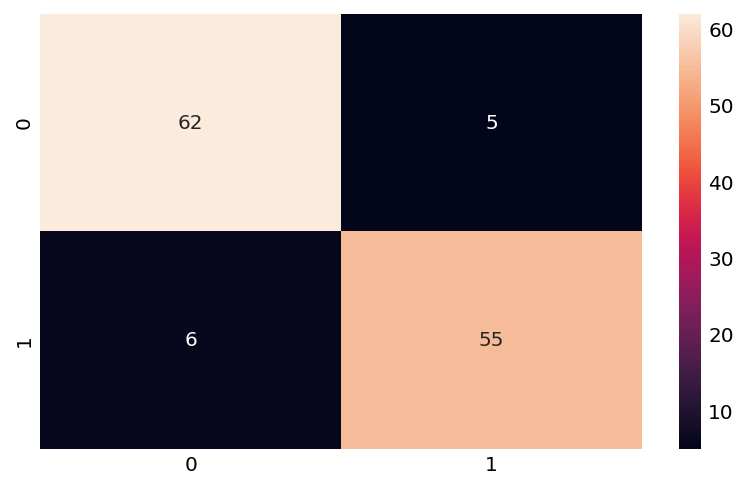

In [67]:
##Logistic Regression Model

#Training set
lg = LogisticRegression()
lg.fit(X_train_r, y_train_r)

y_pred_r = lg.predict(X_test_r)
y_pp_r = lg.predict_proba(X_test_r)[:, 1]

ac = accuracy_score(y_test_r, y_pred_r)
cm = confusion_matrix(y_test_r, y_pred_r)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_r, y_pred_r))
    
print('accuracy_train = {:7.4f}'.format(lg.score(X_train_r, y_train_r)))
print('accuracy_test = {:7.4f}'.format(lg.score(X_test_r, y_test_r)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        68
           1       0.90      0.91      0.91        92

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

accuracy_unseen =  0.8938
accuracy is =  0.89375


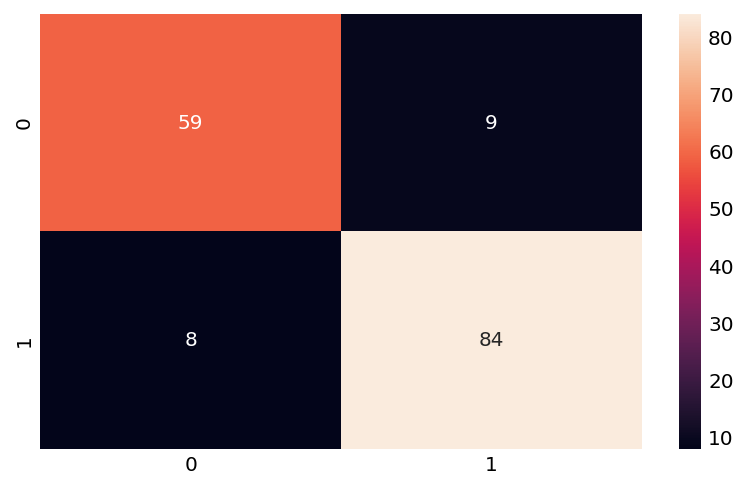

In [68]:
#Unseen set

lg.fit(X_us, y_us)

y_pred_us = lg.predict(X_us)
y_pp_us = lg.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(lg.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4520
           1       0.76      0.56      0.65       480

    accuracy                           0.94      5000
   macro avg       0.86      0.77      0.81      5000
weighted avg       0.94      0.94      0.94      5000

accuracy_whole =  0.9410
accuracy is =  0.941


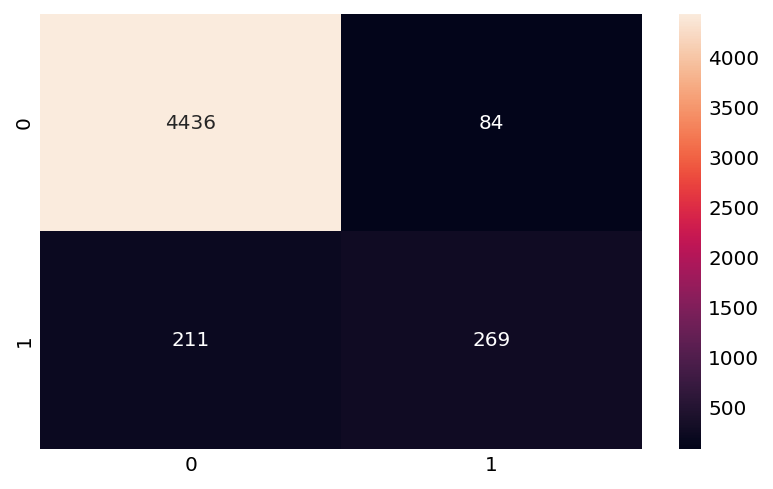

In [71]:
#Whole set

lg.fit(X_wh, y_wh)

y_pred_wh = lg.predict(X_wh)
y_pp_wh = lg.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_whole = {:7.4f}'.format(lg.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.92      0.92      0.92        61

    accuracy                           0.92       128
   macro avg       0.92      0.92      0.92       128
weighted avg       0.92      0.92      0.92       128

accuracy_train =  0.8906
accuracy_test =  0.9219
accuracy is =  0.921875


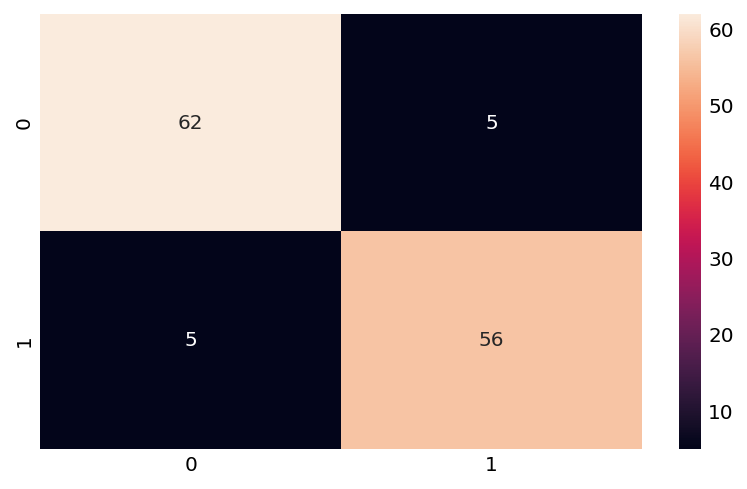

In [72]:
#Support Vectore Machine
#Training set
svm = SVC(kernel='linear', probability=True, max_iter=1000)
svm.fit(X_train_r, y_train_r)

y_pred = svm.predict(X_test_r)
y_pp = svm.predict_proba(X_test_r)[:, 1]

ac = accuracy_score(y_test_r, y_pred)
cm = confusion_matrix(y_test_r, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_r, y_pred))
    
print('accuracy_train = {:7.4f}'.format(svm.score(X_train_r, y_train_r)))
print('accuracy_test = {:7.4f}'.format(svm.score(X_test_r, y_test_r)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.45      0.37      0.41        68
           1       0.59      0.67      0.63        92

    accuracy                           0.54       160
   macro avg       0.52      0.52      0.52       160
weighted avg       0.53      0.54      0.53       160

accuracy_whole =  0.5437
accuracy is =  0.54375


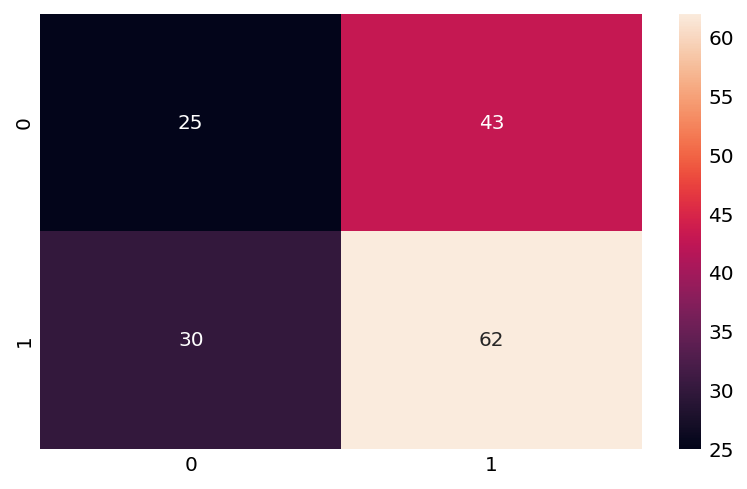

In [73]:
#Unseen set

svm.fit(X_us, y_us)

y_pred_us = svm.predict(X_us)
y_pp_us = svm.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_whole = {:7.4f}'.format(svm.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      4520
           1       0.25      0.66      0.36       480

    accuracy                           0.78      5000
   macro avg       0.60      0.72      0.61      5000
weighted avg       0.89      0.78      0.82      5000

accuracy_whole =  0.7762
accuracy is =  0.7762


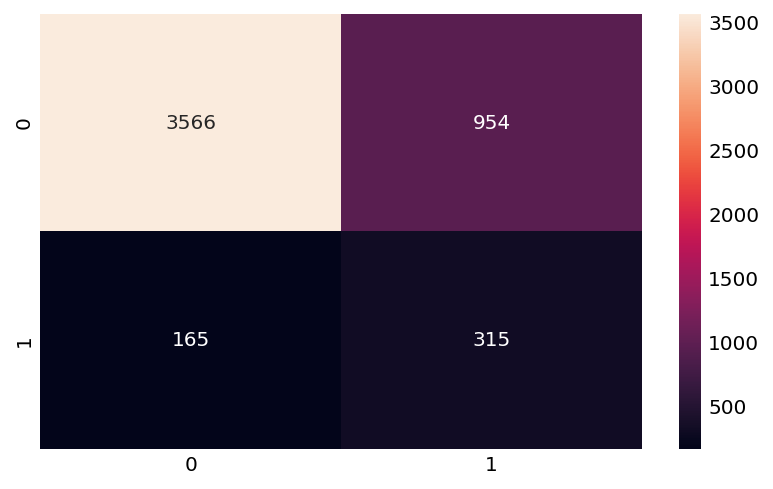

In [74]:
#Whole set

svm.fit(X_wh, y_wh)

y_pred_wh = svm.predict(X_wh)
y_pp_wh = svm.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_whole = {:7.4f}'.format(svm.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        67
           1       0.88      0.80      0.84        61

    accuracy                           0.85       128
   macro avg       0.85      0.85      0.85       128
weighted avg       0.85      0.85      0.85       128

accuracy_train =  0.8281
accuracy_test =  0.8516
accuracy is =  0.8515625


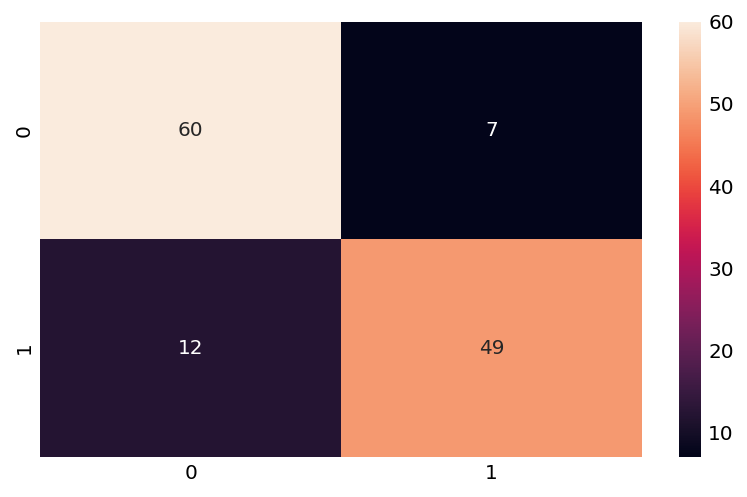

In [75]:
#Naive Bayes model

nb = GaussianNB()

#Training set
nb.fit(X_train_r, y_train_r)

y_pred = nb.predict(X_test_r)
y_pp = nb.predict_proba(X_test_r)[:, 1]

ac = accuracy_score(y_test_r, y_pred)
cm = confusion_matrix(y_test_r, y_pred)
sns.heatmap(cm, annot=True, fmt='d');
print(classification_report(y_test_r, y_pred))
    
print('accuracy_train = {:7.4f}'.format(nb.score(X_train_r, y_train_r)))
print('accuracy_test = {:7.4f}'.format(nb.score(X_test_r, y_test_r)))
print('accuracy is = ', ac)

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        68
           1       0.91      0.82      0.86        92

    accuracy                           0.85       160
   macro avg       0.85      0.86      0.85       160
weighted avg       0.86      0.85      0.85       160

accuracy_unseen =  0.8500
accuracy is =  0.85


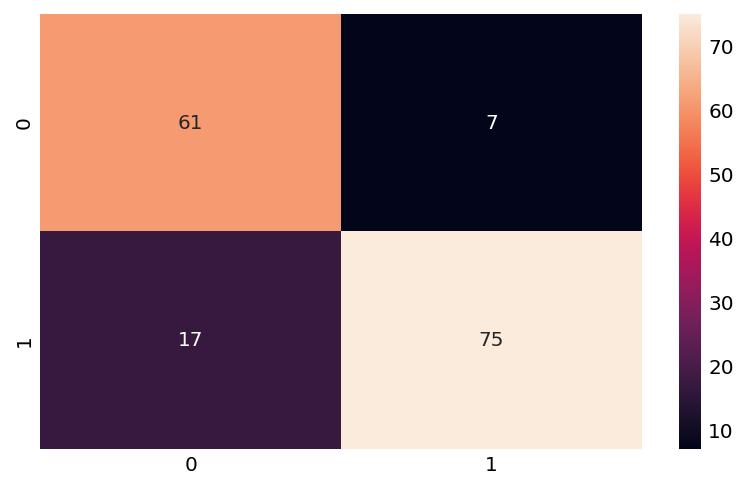

In [76]:
#Unseen set

nb.fit(X_us, y_us)

y_pred_us = nb.predict(X_us)
y_pp_us = nb.predict_proba(X_us)[:, 1]

ac_us = accuracy_score(y_us, y_pred_us)
cm_us = confusion_matrix(y_us, y_pred_us)
sns.heatmap(cm_us, annot=True, fmt='d');
print(classification_report(y_us, y_pred_us))
    
print('accuracy_unseen = {:7.4f}'.format(nb.score(X_us, y_us)))
print('accuracy is = ', ac_us)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4520
           1       0.43      0.59      0.49       480

    accuracy                           0.89      5000
   macro avg       0.69      0.75      0.71      5000
weighted avg       0.90      0.89      0.89      5000

accuracy_unseen =  0.8852
accuracy is =  0.8852


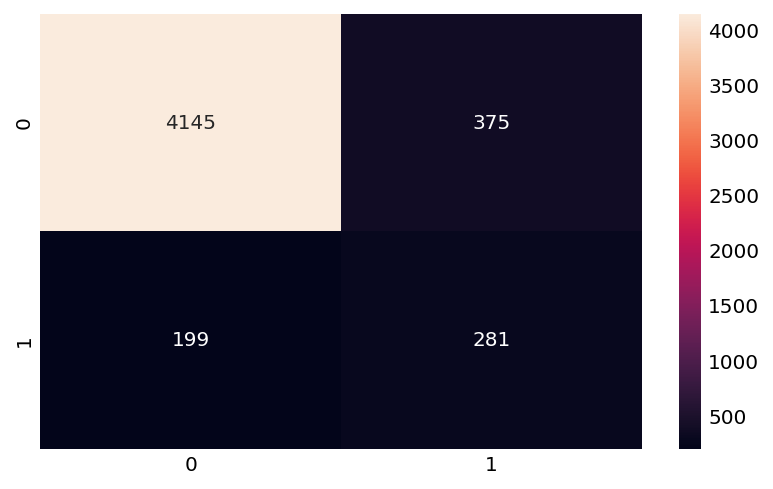

In [77]:
#Whole set

nb.fit(X_wh, y_wh)

y_pred_wh = nb.predict(X_wh)
y_pp_wh = nb.predict_proba(X_wh)[:, 1]

ac_wh = accuracy_score(y_wh, y_pred_wh)
cm_wh = confusion_matrix(y_wh, y_pred_wh)
sns.heatmap(cm_wh, annot=True, fmt='d');
print(classification_report(y_wh, y_pred_wh))
    
print('accuracy_unseen = {:7.4f}'.format(nb.score(X_wh, y_wh)))
print('accuracy is = ', ac_wh)